<div align="center">

# 💙 Job Salaries in 2025

Discover pay trends in **AI, ML, and Data Science jobs worldwide**.

</div>

---

## 💡 About the Dataset

What are data science professionals really earning in 2025?  
This dataset offers a comprehensive look into global salary trends for roles in **Data Science**, **Machine Learning**, and **Artificial Intelligence**.

It is carefully curated using a combination of market research and publicly available sources—including the AIJobs salary survey (CC0 license), 365DataScience, Payscale, KDnuggets, ZipRecruiter, and more—reflecting **real-world compensation patterns from around the globe**.

---

## 🌟 Why This Dataset Matters

Whether you're a data scientist, AI practitioner, student, recruiter, or industry researcher, this dataset can help with:

- Salary prediction and ML modeling  
- Global market benchmarking  
- Career decision-making and negotiation  
- Remote work trend analysis  
- Business intelligence dashboards and visualizations  

---

## 📄 About This File

This dataset captures **real-world salary data** for jobs in **Data Science**, **Artificial Intelligence**, and **Machine Learning** from **2020 to 2025**. Each row represents a reported salary, enriched with attributes like:

- Job title  
- Experience level  
- Company size  
- Remote work ratio  
- Geographic context  

It is ideal for analyzing salary trends over time, comparing roles across countries, and exploring compensation differences by experience, work setting, and more.

---

## 🗂 Column Descriptions

| Column                 | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `work_year`            | Year the salary was reported (2020–2025).                                   |
| `experience_level`     | Seniority level: **EN** (Entry), **MI** (Mid), **SE** (Senior), **EX** (Executive). |
| `employment_type`      | Contract type: **FT** (Full-time), **PT** (Part-time), **CT** (Contract), **FL** (Freelance). |
| `job_title`            | Specific role title (e.g., *Data Scientist*, *ML Engineer*, *AI Specialist*). |
| `salary`               | Gross annual salary in the original currency (before taxes).                |
| `salary_currency`      | Original currency (e.g., USD, EUR, INR).                                    |
| `salary_in_usd`        | Salary converted to USD using 2025 exchange rates.                           |
| `employee_residence`   | Employee’s country (ISO 3166-1 alpha-2 code).                                |
| `remote_ratio`         | Remote work percentage: 0 = On-site, 50 = Hybrid, 100 = Fully remote.       |
| `company_location`     | Company headquarters country (ISO 3166-1 alpha-2 code).                      |
| `company_size`         | Company size: **S** (1–50), **M** (51–500), **L** (501+ employees).        |


---

# 🚀 Goal of the Analysis

We aim to uncover global salary patterns and trends across the Data Science and AI/ML industry by answering questions like:

- How do salaries differ by job title and experience level?
- Which countries or regions offer the highest average salaries?
- How does remote work affect compensation?
- Are there differences across company sizes?
- How have salaries evolved from 2020 to 2025?

## ✨ First Steps

We will begin with the **first step in the data analysis workflow: Data Cleaning**, which includes:

- **Inspecting the dataset** to understand its structure and identify potential issues  
- **Handling missing values** (e.g., removing, imputing, or flagging them depending on context)  
- **Detecting and correcting inconsistencies** such as incorrect data types, formatting errors, or invalid entries  
- **Removing duplicates** to ensure data integrity  
- **Standardizing categorical values** for consistency across the dataset  
- **Identifying and addressing outliers** that may skew further analysis  
- **Ensuring overall data quality** before proceeding to exploratory data analysis  



*🧠 Let’s explore the data and uncover insights that drive the future of AI and Data Science!*

</div>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load data
df = pd.read_csv("salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516.0,USD,348516.0,US,0,US,M
1,2025,EX,FT,Head of Data,232344.0,USD,232344.0,US,7,US,M
2,2025,SE,FT,Data Scientist,145400.0,USD,145400.0,US,0,US,M
3,2025,SE,FT,Data Scientist,81600.0,USD,81600.0,US,0,US,M
4,2025,MI,FT,Engineer,160000.0,USD,160000.0,US,100,US,M


In [4]:
# Display DataFrame shape
df.shape

(151445, 11)

In [5]:
# Display basic info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           151445 non-null  int64  
 1   experience_level    151445 non-null  object 
 2   employment_type     151445 non-null  object 
 3   job_title           150697 non-null  object 
 4   salary              149931 non-null  float64
 5   salary_currency     151445 non-null  object 
 6   salary_in_usd       151445 non-null  float64
 7   employee_residence  150696 non-null  object 
 8   remote_ratio        151445 non-null  int64  
 9   company_location    151445 non-null  object 
 10  company_size        151445 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 12.7+ MB


In [6]:
# Create a summary table for missing values
summary = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum(),
    'Missing Count': df.isnull().sum()
})

# Add percentage of missing values
summary['Missing %'] = (summary['Missing Count'] / len(df) * 100).round(2)

# Display the summary table
summary

,Column,Non-Null Count,Missing Count,Missing %
work_year,work_year,151445,0,0.00
experience_level,experience_level,151445,0,0.00
employment_type,employment_type,151445,0,0.00
job_title,job_title,150697,748,0.49
salary,salary,149931,1514,1.00
salary_currency,salary_currency,151445,0,0.00
salary_in_usd,salary_in_usd,151445,0,0.00
employee_residence,employee_residence,150696,749,0.49
remote_ratio,remote_ratio,151445,0,0.00
company_location,company_location,151445,0,0.00


<h3 style="text-align:center; color:blue;">📝 Dataset Summary (Pre-Cleaning)</h3>

<ul>
<li>The dataset has <b>151,445 rows</b> and <b>11 columns</b>.</li>
<li>Columns with missing values:
    <ul>
        <li><b>job_title</b></li>
        <li><b>salary</b></li>
        <li><b>employee_residence</b></li>
    </ul>
</li>
</ul>

<p style="color:blue;">💡 <b>Note:</b> This is the raw dataset before cleaning. We will address missing values, invalid country codes, and outliers in the next steps.</p>


In [8]:
# ----------------------------
# Handling Missing Values
# ----------------------------

# job_title: fill missing with 'Unknown'
df['job_title'] = df['job_title'].fillna('Unknown')

# salary: fill missing with the median salary
df['salary'] = df['salary'].fillna(df['salary'].median())

# employee_residence: 
#  If missing and remote_ratio is 0, assume the employee lives in the company location
mask = df['employee_residence'].isna() & (df['remote_ratio'] == 0)
df.loc[mask, 'employee_residence'] = df.loc[mask, 'company_location']

# Fill any remaining missing values with the most frequent country (mode)
df['employee_residence'] = df['employee_residence'].fillna(df['employee_residence'].mode()[0])

# ----------------------------
# Verify that no missing values remain
# ----------------------------
missing_summary = df.isna().sum()  # Count of missing values per column
print("✅ Missing values per column:")
print(missing_summary)

✅ Missing values per column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [9]:
# -------------------------------
# Find all fully identical duplicates (all columns)
# -------------------------------
duplicates = df[df.duplicated(keep=False)]  # keep=False catches all instances
num_duplicates = duplicates.shape[0]

print(f"🔹 Total number of fully identical duplicate rows: {num_duplicates}")

# ------------------------------
# Remove duplicates, keeping only one instance of each
# -------------------------------
df = df.drop_duplicates(keep='first')

print(f"\n✅ Duplicates removed. New dataset shape: {df.shape}\n")

🔹 Total number of fully identical duplicate rows: 76

✅ Duplicates removed. New dataset shape: (151400, 11)



In [10]:
# Check the data types of each column
df.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object

In [11]:
# Unique value counts for each column
for column in df.columns:
    print(f"Column {column}:")
    print(df[column].value_counts())
    print("—" * 40)  

Column work_year:
work_year
2025    78702
2024    62220
2023     8524
2022     1661
2021      218
2020       75
Name: count, dtype: int64
————————————————————————————————————————
Column experience_level:
experience_level
SE            85728
MI            45182
EN            13375
EX             4086
Senior          625
executivee      612
EXX             602
mi              596
Enn             594
Name: count, dtype: int64
————————————————————————————————————————
Column employment_type:
employment_type
FT            148995
CT               459
PT               416
Freelanc         332
part-time        299
Contractor       297
FullTime         296
F/T              290
FL                16
Name: count, dtype: int64
————————————————————————————————————————
Column job_title:
job_title
Data Scientist                       18461
Software Engineer                    16681
Data Engineer                        16121
Data Analyst                         13578
Engineer                            

<h3 style="text-align:center; color:blue;">🔍 Observations on Dataset Columns (Pre-Cleaning)</h3>

<ul style="color:black;">
<li><b>work_year:</b> Mostly valid values 2020–2025, looks fine.</li>
<li><b>experience_level:</b> Contains some incorrect or inconsistent values (<code>Senior</code> <code>executivee</code>, <code>EXX</code>, <code>mi</code>, <code>Enn</code>).</li>
<li><b>employment_type:</b> Some wrong or inconsistent entries, (<code>Freelanc</code>, <code>part-time</code>, <code>Contractor</code>,<code>FullTime</code>, <code>F/T</code>,  <code>FL</code>).</li>
<li><b>job_title:</b> Mostly fine, but many rare or misformatted titles. Could standardize capitalization and spacing.</li>
<li><b>salary:</b> Mostly numeric, no obvious errors, but check outliers (very low or very high values).</li>
<li><b>salary_currency:</b> Some inconsistencies, e.g., USD variants (<code>USD</code>, <code>US Dollars</code>, <code>usd</code>), EUR variants (<code>EUR</code>, <code>EURO</code>), INR variants (<code>Inr</code>, <code>INR</code>).</li>
<li><b>salary_in_usd:</b> Mostly fine, derived from salary and salary_currency.</li>
<li><b>employee_residence:</b> Mostly valid ISO codes, but check for any invalid/unexpected codes.</li>
<li><b>remote_ratio:</b> Mostly 0, 50, 100; some strange values like <code>2</code>, <code>112</code>, <code>31</code>, <code>54</code>.</li>
<li><b>company_location:</b> Mostly valid ISO codes, some rare countries with very few entries.</li>
<li><b>company_size:</b> Inconsistent entries, (Small, Medium, XL, Large, micro, XXL).</li>
</ul>

<p style="color:blue;">💡 <b>Note:</b> These are observations before cleaning. Next steps include standardizing categories, correcting invalid codes and handling outliers.</p>



In [13]:
# ----------------------------
# Standardizing values
# ----------------------------

# experience_level: standardize to : EN (Entry), MI (Mid), SE (Senior), EX (Executive).
experience_map = {
    'EN': 'EN', 'MI': 'MI', 'SE': 'SE', 'EX': 'EX',
    'executivee': 'EX', 'EXX': 'EX', 'mi': 'MI', 'Enn': 'EN', 'Senior': 'SE'}
df['experience_level'] = df['experience_level'].map(lambda x: experience_map.get(x, x))

# employment_type: standardize to FT, PT, CT, FL
employment_map = {
    'FT': 'FT', 'PT': 'PT', 'CT': 'CT', 'FL': 'FL',
    'Freelanc': 'FL', 'F/T': 'FT', 'Contractor': 'CT', 'FullTime': 'FT', 'part-time': 'PT'}
df['employment_type'] = df['employment_type'].map(lambda x: employment_map.get(x, x))

# company_size: standardize to S, M, L
company_size_map = {
    'S': 'S', 'M': 'M', 'L': 'L',
    'Small': 'S', 'Medium': 'M', 'Large': 'L', 'XL': 'L', 'micro': 'S', 'XXL': 'L'
}
df['company_size'] = df['company_size'].map(lambda x: company_size_map.get(x, x))

# salary_currency: standardize common variants
salary_currency_map = {
    'USD': 'USD', 'US Dollars': 'USD', 'usd': 'USD',
    'EUR': 'EUR', 'EURO': 'EUR',
    'INR': 'INR', 'Inr': 'INR'
}
df['salary_currency'] = df['salary_currency'].map(lambda x: salary_currency_map.get(x, x))

# remote_ratio: correct invalid values by clipping to 0–100
def fix_remote_ratio(x):
    if x < 25:
        return 0
    elif 25 <= x < 75:
        return 50
    else:
        return 100

df['remote_ratio'] = df['remote_ratio'].apply(fix_remote_ratio)

# ----------------------------
# Check unique values after cleaning
# ----------------------------
print("\n✅ Unique experience levels:", df['experience_level'].unique())
print("✅ Unique employment types:", df['employment_type'].unique())
print("✅ Unique company sizes:", df['company_size'].unique())
print("✅ Unique salary currencies:", df['salary_currency'].unique())
print("✅ Unique remote_ratio values:", list(df['remote_ratio'].unique()))


✅ Unique experience levels: ['EX' 'SE' 'MI' 'EN']
✅ Unique employment types: ['FT' 'CT' 'PT' 'FL']
✅ Unique company sizes: ['M' 'L' 'S']
✅ Unique salary currencies: ['USD' 'EUR' 'GBP' 'INR' 'CAD' 'AUD' 'PLN' 'CHF' 'SGD' 'CZK' 'NOK' 'MXN'
 'PHP' 'JPY' 'HUF' 'TWD' 'BRL' 'ZAR' 'DKK' 'ILS' 'TRY' 'SEK' 'NZD' 'HKD'
 'THB' 'CLP']
✅ Unique remote_ratio values: [0, 100, 50]


<h3 style=" color:blue;">🔹 Needs Further Checking</h3>

- **job_title:** Mostly fine, but many rare or misformatted titles. Could standardize capitalization and spacing.  
- **salary:** Mostly numeric, no obvious errors, but check outliers (very low or very high values).  
- **salary_in_usd:** Mostly fine, derived from salary and salary_currency.  
- **employee_residence:** Mostly valid ISO codes, but check for any invalid or unexpected codes.  
- **company_location:** Mostly valid ISO codes, some rare countries with very few entries.  

<p style="color:blue;">💡 <b>Note:</b> These columns require further review and cleaning before analysis.</p>



In [15]:
# -------------------------------
# job_title: Check for misformatted or rare titles
# -------------------------------
# Count of unique job titles
print("Number of unique job titles:", df['job_title'].nunique())

# Show rare job titles that occur only once or twice
rare_job_titles = df['job_title'].value_counts()[df['job_title'].value_counts() <= 2]
print("Rare job titles (occurring <=2 times):")
print(rare_job_titles)

Number of unique job titles: 427
Rare job titles (occurring <=2 times):
job_title
Elasticsearch Administrator            2
Apprentice                             2
Experienced Quantitative Strategist    2
Compliance Data Analyst                2
Big Data Architect                     2
                                      ..
Quantitative Research Analyst          1
Advanced Analytics Manager             1
Quant Trader                           1
Safety Data Management Specialist      1
Big Data Analyst                       1
Name: count, Length: 96, dtype: int64


<p style="color:blue;"> <b>Note:</b> 🔍 Job Title Check — Explanation & Next Steps</p>

- The dataset contains **427 unique job titles**, which is quite high.  
- **96 titles appear only once or twice**, making them rare and potentially inconsistent.

> **Note:** Although job title standardization and grouping would improve analysis quality, we will not perform it at this stage due to the time required.



In [17]:
# -------------------------------
# salary: Check numeric consistency and outliers
# -------------------------------
# Basic statistics
print("\n 📊 Basic salary statistics (original currency):")
print(df['salary'].describe())
print("\n")

# Lowest 10 salaries (likely entry-level or low-cost countries)
lowest_salaries = df[df['salary_in_usd'] < 30000][
    ['salary_in_usd', 'salary_currency', 'job_title', 'experience_level','employee_residence']
].sort_values(by='salary_in_usd').head(10)

# Highest 10 salaries (likely senior/executive roles or high-paying regions)
highest_salaries = df[df['salary_in_usd'] > 500000][
    ['salary_in_usd', 'salary_currency', 'job_title', 'experience_level','employee_residence']
].sort_values(by='salary_in_usd', ascending=False).head(10)

# Display the tables
print("🔹 10 Lowest Salaries (USD)")
display(lowest_salaries)

print("🔹 10 Highest Salaries (USD)")
display(highest_salaries)


 📊 Basic salary statistics (original currency):
count    1.514000e+05
mean     1.627113e+05
std      2.079292e+05
min      1.400000e+04
25%      1.063490e+05
50%      1.469000e+05
75%      1.980000e+05
max      3.040000e+07
Name: salary, dtype: float64


🔹 10 Lowest Salaries (USD)


,salary_in_usd,salary_currency,job_title,experience_level,employee_residence
45209,12726.324407,EUR,Data Management Specialist,MI,LV
148473,14367.888382,INR,Unknown,MI,IN
145711,15000.000000,USD,Business Intelligence Developer,MI,GH
150550,15000.000000,USD,Machine Learning Developer,EN,TH
147922,15000.000000,USD,Staff Data Analyst,EX,NG
150847,15000.000000,USD,Data Analyst,EN,ID
97343,15107.000000,PHP,BI Analyst,EN,PH
123670,15129.000000,EUR,Software Development Engineer,EN,RO
63638,15157.000000,EUR,Data Analyst,EN,FR
67087,15262.321018,TWD,Algorithm Developer,EN,TW


🔹 10 Highest Salaries (USD)


,salary_in_usd,salary_currency,job_title,experience_level,employee_residence
67596,819449.893607,USD,Machine Learning Scientist,MI,US
71362,814956.014180,EUR,Data Engineer,EN,AT
30884,800000.000000,USD,Architect,SE,US
137715,800000.000000,USD,AI Architect,MI,CA
54251,800000.000000,USD,Software Engineer,MI,US
71363,795744.349275,EUR,Data Engineer,EN,AT
138558,774000.000000,USD,Data Analyst,EN,MX
54253,757348.847136,USD,Software Engineer,SE,US
38716,755553.624874,USD,Machine Learning Scientist,SE,US
10305,755483.435748,USD,Data Scientist,SE,US


<p style="color:blue;"> <b>Note:</b> 🔍 Salary Extremes & Visualization Plan</p>

* The **lowest salaries** (around $12k–$15k USD) come primarily from countries with lower cost of living. These values are realistic for those regions, even when the roles are mid-level.
* The **highest salaries** (~$750k–$815k USD) are associated with senior or specialized positions, often in high-paying markets such as the US or Western Europe. Some may include bonuses or equity, which explains the extreme values.

Using salary_in_usd is essential because raw `salary` in local currencies are not comparable across countries and can be highly misleading.

💡 **Plan:** We will keep all salary values in the dataset, including the extreme highs and lows, but **use a log scale for visualizations**.  

This approach allows us to:

- **Show all data** without removing realistic salaries from low-cost-of-living countries.  
- **Prevent extreme values** from distorting the visual trends.  
- Create **clear, professional plots** that highlight both typical salaries and outliers.


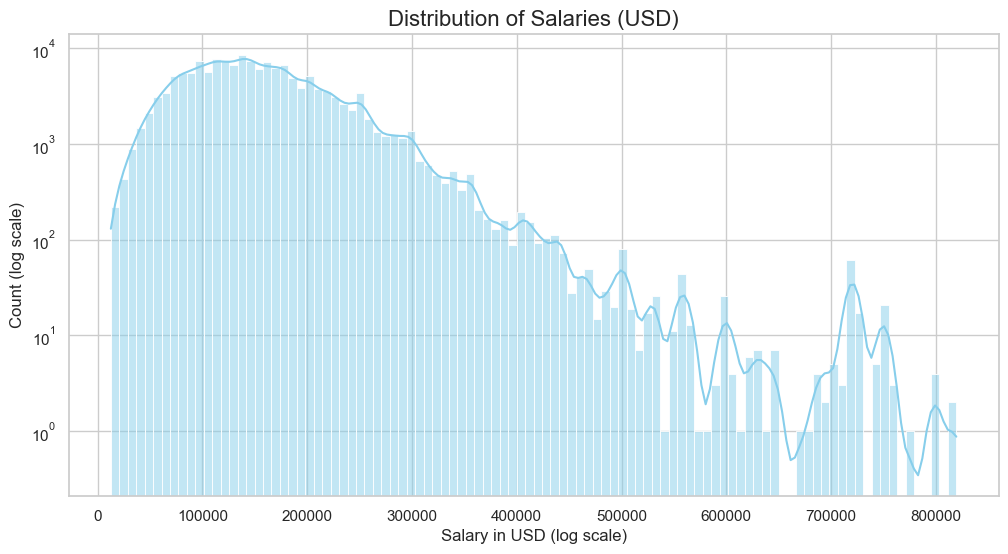

In [19]:
# Set plot style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(12,6))

# Plot salary_in_usd with log scale
sns.histplot(df['salary_in_usd'], bins=100, kde=True, color='skyblue')

# Set y-axis to log scale
plt.yscale('log')

# Titles and labels
plt.title('Distribution of Salaries (USD)', fontsize=16)
plt.xlabel('Salary in USD (log scale)', fontsize=12)
plt.ylabel('Count (log scale)', fontsize=12)

# Show plot
plt.show()

In [20]:
import pycountry

def list_invalid_iso_codes(df, column_name):
    """
    Identify and list invalid ISO alpha-2 country codes in a DataFrame column.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing the column to check.
    column_name : str
        The name of the column with country codes.

    Returns:
    --------
    invalid_codes : list
        A list of codes in the column that are not valid ISO alpha-2 country codes.

    Prints:
    -------
    - All unique codes in the column.
    - Codes that are invalid (not recognized as ISO alpha-2).
    """
    
    # List unique codes
    unique_codes = df[column_name].unique()
    print(f"\n🔹 Unique {column_name} codes:", unique_codes)

    # List valid ISO alpha-2 codes
    valid_iso_codes = [c.alpha_2 for c in pycountry.countries]

    # Detect invalid codes
    invalid_codes = [code for code in unique_codes if code not in valid_iso_codes]
    print(f"\n⚠️ Invalid {column_name} codes:", invalid_codes)
    print("\n")

    return invalid_codes

In [21]:
# Check for invalid country codes 
invalid_employee_residence = list_invalid_iso_codes(df, 'employee_residence')


🔹 Unique employee_residence codes: ['US' 'DEU' 'CA' 'USA' 'NL' 'IN' 'FR' 'GB' 'IND' 'DE' 'ES' 'IE' 'AU' 'CA.'
 'LT' 'EE' 'SK' 'CZ' 'UK' 'UA' 'FI' 'CO' 'AR' 'AT' 'EG' 'SG' 'MX' 'IT'
 'PL' 'BE' 'CH' 'GR' 'NZ' 'HR' 'PR' 'PT' 'BR' 'PH' 'RO' 'ML' 'NO' 'CL'
 'MY' 'SV' 'DO' 'GT' 'CR' 'LV' 'ZA' 'JO' 'CY' 'TH' 'JM' 'JP' 'MT' 'MK'
 'SI' 'HK' 'LS' 'ID' 'PE' 'HU' 'PA' 'LU' 'DZ' 'KE' 'CD' 'SE' 'KR' 'TW'
 'TR' 'NG' 'DK' 'AE' 'BG' 'RS' 'EC' 'XK' 'ZM' 'AM' 'RW' 'IL' 'LB' 'PK'
 'HN' 'VE' 'BM' 'VN' 'GE' 'SA' 'OM' 'BA' 'UG' 'MU' 'QA' 'RU' 'TN' 'GH'
 'AD' 'MD' 'UZ' 'CF' 'KW' 'IR' 'AS' 'CN' 'BO' 'IQ' 'JE']

⚠️ Invalid employee_residence codes: ['DEU', 'USA', 'IND', 'CA.', 'UK', 'XK']




In [22]:
# -------------------------------
# Clean invalid employee_residence codes
# -------------------------------

# Map non-standard codes to proper ISO alpha-2 codes
employee_residence_mapping = {
    'DEU': 'DE',
    'USA': 'US',
    'IND': 'IN',
    'CA.': 'CA',
    'UK': 'GB'}

# Apply the mapping to the DataFrame
df['employee_residence'] = df['employee_residence'].replace(employee_residence_mapping)

# Verify that all country codes are now valid
invalid_employee_residence = list_invalid_iso_codes(df, 'employee_residence')


🔹 Unique employee_residence codes: ['US' 'DE' 'CA' 'NL' 'IN' 'FR' 'GB' 'ES' 'IE' 'AU' 'LT' 'EE' 'SK' 'CZ'
 'UA' 'FI' 'CO' 'AR' 'AT' 'EG' 'SG' 'MX' 'IT' 'PL' 'BE' 'CH' 'GR' 'NZ'
 'HR' 'PR' 'PT' 'BR' 'PH' 'RO' 'ML' 'NO' 'CL' 'MY' 'SV' 'DO' 'GT' 'CR'
 'LV' 'ZA' 'JO' 'CY' 'TH' 'JM' 'JP' 'MT' 'MK' 'SI' 'HK' 'LS' 'ID' 'PE'
 'HU' 'PA' 'LU' 'DZ' 'KE' 'CD' 'SE' 'KR' 'TW' 'TR' 'NG' 'DK' 'AE' 'BG'
 'RS' 'EC' 'XK' 'ZM' 'AM' 'RW' 'IL' 'LB' 'PK' 'HN' 'VE' 'BM' 'VN' 'GE'
 'SA' 'OM' 'BA' 'UG' 'MU' 'QA' 'RU' 'TN' 'GH' 'AD' 'MD' 'UZ' 'CF' 'KW'
 'IR' 'AS' 'CN' 'BO' 'IQ' 'JE']

⚠️ Invalid employee_residence codes: ['XK']




<div style="color:blue; ont-weight:bold;">
📝 Note on Kosovo (XK)
</div>

The ISO 3166-1 alpha-2 standard **does not officially assign the code “XK”,  but it is **widely used in datasets** to represent **Kosovo**.


💡 **Plan:** We will **keep the code `XK`** in the dataset to represent Kosovo, since it is commonly used and does not affect analysis.

To ensure clarity in visualizations and reports, we will:

- Replace `XK` with the label **“Kosovo”** when creating plots or tables.  
- Keep the original ISO-like code (`XK`) in the dataset for consistency.  
- Add a short note in the documentation that `XK` refers to Kosovo.



In [24]:
# Create a new column for plotting, replacing 'XK' with 'Kosovo'
df['employee_residence'] = df['employee_residence'].replace({'XK': 'Kosovo'})

In [25]:
# -------------------------------
# company_location: Check for invalid ISO country codes
# -------------------------------

# Check invalid codes in the company_location column
invalid_company_locations = list_invalid_iso_codes(df, 'company_location')



🔹 Unique company_location codes: ['US' 'CA' 'IND' 'NL' 'FR' 'GB' 'DEU' 'DE' 'ES' 'IE' 'AU' 'LT' 'USA' 'IN'
 'EE' 'CA.' 'SK' 'CZ' 'UA' 'FI' 'CO' 'AR' 'AT' 'EG' 'SG' 'MX' 'IT' 'PL'
 'BE' 'CH' 'GR' 'NZ' 'HR' 'PR' 'PT' 'BR' 'PH' 'RO' 'ML' 'NO' 'CL' 'MY'
 'SV' 'DO' 'GT' 'CR' 'LV' 'ZA' 'JO' 'CY' 'TH' 'JM' 'JP' 'MT' 'MK' 'SI'
 'HK' 'LS' 'PE' 'HU' 'PA' 'LU' 'DZ' 'KE' 'CD' 'SE' 'KR' 'TW' 'TR' 'DK'
 'AE' 'BG' 'ID' 'RS' 'EC' 'XK' 'ZM' 'AM' 'IL' 'LB' 'NG' 'PK' 'HN' 'VE'
 'AS' 'SA' 'OM' 'BA' 'VN' 'GI' 'MU' 'RU' 'QA' 'GH' 'AD' 'CF' 'IR' 'BS'
 'IQ' 'CN' 'MD']

⚠️ Invalid company_location codes: ['IND', 'DEU', 'USA', 'CA.', 'XK']




In [26]:
# -------------------------------
# Clean invalid company location codes
# -------------------------------

# Create mapping for invalid -> valid ISO codes
company_location_mapping = {
    'IND': 'IN',
    'DEU': 'DE',
    'USA': 'US',
    'CA.': 'CA'}

# Apply the mapping to the DataFrame
df['company_location'] = df['company_location'].replace(company_location_mapping)

# Verify that all country codes are now valid
invalid_company_location = list_invalid_iso_codes(df, 'company_location')


🔹 Unique company_location codes: ['US' 'CA' 'IN' 'NL' 'FR' 'GB' 'DE' 'ES' 'IE' 'AU' 'LT' 'EE' 'SK' 'CZ'
 'UA' 'FI' 'CO' 'AR' 'AT' 'EG' 'SG' 'MX' 'IT' 'PL' 'BE' 'CH' 'GR' 'NZ'
 'HR' 'PR' 'PT' 'BR' 'PH' 'RO' 'ML' 'NO' 'CL' 'MY' 'SV' 'DO' 'GT' 'CR'
 'LV' 'ZA' 'JO' 'CY' 'TH' 'JM' 'JP' 'MT' 'MK' 'SI' 'HK' 'LS' 'PE' 'HU'
 'PA' 'LU' 'DZ' 'KE' 'CD' 'SE' 'KR' 'TW' 'TR' 'DK' 'AE' 'BG' 'ID' 'RS'
 'EC' 'XK' 'ZM' 'AM' 'IL' 'LB' 'NG' 'PK' 'HN' 'VE' 'AS' 'SA' 'OM' 'BA'
 'VN' 'GI' 'MU' 'RU' 'QA' 'GH' 'AD' 'CF' 'IR' 'BS' 'IQ' 'CN' 'MD']

⚠️ Invalid company_location codes: ['XK']




In [27]:
# Create a new column for plotting, replacing 'XK' with 'Kosovo'
df['company_location'] = df['company_location'].replace({'XK': 'Kosovo'})

In [28]:
# change object type to category
categorie = ["experience_level","employment_type","job_title","salary_currency", "employee_residence", "company_location", "company_size"]

for column in categorie:
    df[column] = df[column].astype("category")

print(df.dtypes)

work_year                int64
experience_level      category
employment_type       category
job_title             category
salary                 float64
salary_currency       category
salary_in_usd          float64
employee_residence    category
remote_ratio             int64
company_location      category
company_size          category
dtype: object


<div style="text-align:center; color:blue; font-size:20px; font-weight:bold;"> ✅ Final Data Quality Check </div>
<br>
🔹 Before moving forward with analysis, we performed a thorough cleaning and validation of the dataset. 
<br>


In [30]:
import pycountry

def check_and_clean_dataset(df):
    """
    Performs a final data quality check and basic cleaning on a DataFrame.

    Steps performed:
    1. Checks for missing values in each column and prints a summary.
    2. Displays unique values for categorical columns:
       - experience_level
       - employment_type
       - company_size
       - remote_ratio
    3. Prints salary statistics and the min/max range for 'salary_in_usd'.
    4. Validates ISO country codes for 'employee_residence' and 'company_location',
       allowing 'Kosovo' as a special case.
    5. Identifies and prints any duplicate rows.
    6. Removes duplicate rows and prints the new dataset shape.
    7. Displays the final shape of the dataset and data types of each column.

    Parameters:
    df (pandas.DataFrame): Input dataset to be checked and cleaned.

    Returns:
    pandas.DataFrame: Cleaned dataset with duplicates removed.
    """
    
    print("\n" + "-"*40)
    print("        FINAL DATA QUALITY CHECK")
    print("-"*40 + "\n")
    
    # Missing values
    missing_summary = df.isnull().sum()
    if missing_summary.sum() > 0:
        print("✅ Missing values per column:")
        print(missing_summary[missing_summary > 0])
    else:
        print("✅ No missing values found in any column.")
    
    # Unique values for categorical columns
    print("\n✅ Unique values for categorical columns:")
    for col in ['experience_level', 'employment_type', 'company_size', 'remote_ratio']:
        print(f"🔹 {col}: {df[col].unique()}")
    
    # Salary ranges and stats
    print("\n✅ Salary (USD) statistics:")
    print(f"🔹 Range: {df['salary_in_usd'].min()} to {df['salary_in_usd'].max()}")
    print(f"🔹 Summary:\n{df['salary_in_usd'].describe()}")
    
    # Country code validation
    valid_codes = [c.alpha_2 for c in pycountry.countries]
    
    invalid_residences = [code for code in df['employee_residence'].unique() 
                          if code not in valid_codes and code != 'Kosovo']
    invalid_locations = [code for code in df['company_location'].unique() 
                         if code not in valid_codes and code != 'Kosovo']
    
    if invalid_residences:
        print("\n⚠️ Invalid employee residence codes:", invalid_residences)
    else:
        print("\n✅ All employee residence codes are valid.")
    
    if invalid_locations:
        print("⚠️ Invalid company location codes:", invalid_locations)
    else:
        print("✅ All company location codes are valid.")
    
    # Remove duplicates
    duplicates_count = df.duplicated().sum()
    print(f"\n✅ Total duplicates found: {duplicates_count}")
    
    df_cleaned = df.drop_duplicates()
    print(f"✅ Duplicates removed. New dataset shape: {df_cleaned.shape}")
    
    # Final shape & dtypes
    print("\n✅ Final dataset shape:", df_cleaned.shape)
    print("\n✅ Column data types:")
    print(df_cleaned.dtypes)
    
    return df_cleaned


In [31]:
df_cleaned = check_and_clean_dataset(df)


----------------------------------------
        FINAL DATA QUALITY CHECK
----------------------------------------

✅ No missing values found in any column.

✅ Unique values for categorical columns:
🔹 experience_level: ['EX', 'SE', 'MI', 'EN']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']
🔹 employment_type: ['FT', 'CT', 'PT', 'FL']
Categories (4, object): ['CT', 'FL', 'FT', 'PT']
🔹 company_size: ['M', 'L', 'S']
Categories (3, object): ['L', 'M', 'S']
🔹 remote_ratio: [  0 100  50]

✅ Salary (USD) statistics:
🔹 Range: 12726.324406826008 to 819449.8936071652
🔹 Summary:
count    151400.000000
mean     157537.613654
std       74318.867658
min       12726.324407
25%      105610.311059
50%      146240.474646
75%      198000.000000
max      819449.893607
Name: salary_in_usd, dtype: float64

✅ All employee residence codes are valid.
✅ All company location codes are valid.

✅ Total duplicates found: 81
✅ Duplicates removed. New dataset shape: (151319, 11)

✅ Final dataset shape: (151319, 11)

In [32]:
# Export cleaned dataset
df_cleaned.to_csv("dataset_clean.csv", index=False)
print("✅ Cleaned dataset exported to 'dataset_clean.csv'\n")

✅ Cleaned dataset exported to 'dataset_clean.csv'



In [33]:
# Display summary statistics for each column
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,151400.000000,1.514000e+05,151400.000000,151400.000000
mean,2024.435284,1.627113e+05,157537.613654,20.983487
std,0.671885,2.079292e+05,74318.867658,40.623786
min,2020.000000,1.400000e+04,12726.324407,0.000000
25%,2024.000000,1.063490e+05,105610.311059,0.000000
50%,2025.000000,1.469000e+05,146240.474646,0.000000
75%,2025.000000,1.980000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,819449.893607,100.000000


<div style="text-align:center; color:blue; font-size:20px; font-weight:bold;">
🚀 Next Steps
</div>

Now that the dataset is clean and consistent, we can proceed with the **exploratory data analysis (EDA)** to uncover insights, such as:

* Distribution of salaries by **job title**, **experience level**, and **employment type**
* **Geographical salary differences** across countries and regions
* The impact of **remote work** and **company size** on salaries
* **Salary trends over time** (2020–2025)

---